In [1]:
import sklearn
import pandas
from pandas import pivot_table
import numpy
import matplotlib
import matplotlib.pylab as plt
import os, sys
import traceback
%matplotlib inline

In [2]:
red = pandas.io.parsers.read_csv('C:\\Users\\Dan\\Notebooks\\Datasets\\winequality-red.csv', sep=';')
white = pandas.io.parsers.read_csv('C:\\Users\\Dan\\Notebooks\\Datasets\\winequality-white.csv', sep=';')

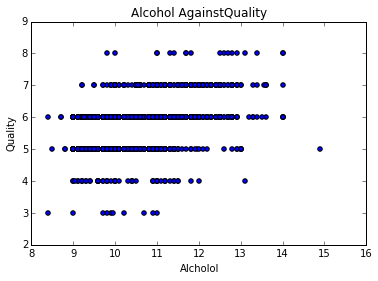

In [34]:
plt.scatter(red['alcohol'], red['quality'])
plt.xlabel('Alcholol')
plt.ylabel('Quality')
plt.title('Alcohol AgainstQuality')
plt.show()

In [35]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X = red[list(red.columns)[:-1]]
y = red['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print 'R-squared:', regressor.score(X_test, y_test)

#cross validation, cv = 5 fold
scores = cross_val_score(regressor, X, y, cv=5)
print scores.mean(), scores

R-squared: 0.31918382857
0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


In [45]:
for i, val in enumerate(y_predictions):
    if i < 10:
        print 'Predicted: ', val, ' Actual: ', y_test[i]

Predicted:  5.96310888333  Actual:  7
Predicted:  6.28115539617  Actual:  6
Predicted:  5.25223558754  Actual:  5
Predicted:  6.35859961532  Actual:  6
Predicted:  6.1475740095  Actual:  6
Predicted:  5.07880031765  Actual:  5
Predicted:  5.38844297122  Actual:  5
Predicted:  4.90178792569  Actual:  6
Predicted:  5.02891196121  Actual:  5
Predicted:  5.61705173256  Actual:  6


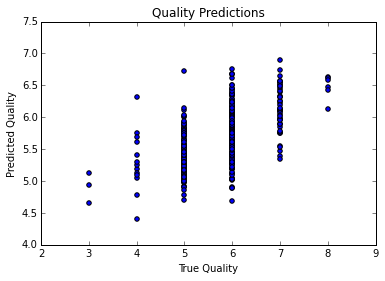

In [48]:
plt.scatter(y_test, y_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Quality Predictions')
plt.show()

In [4]:
#Same model using SGDRegressor instead
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

X = red[list(red.columns)[:-1]]
y = red['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)


C:\Users\Dan\Anaconda\lib\site-packages\sklearn\utils\validation.py:332: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [23]:
#n_iter=number iterations, higher number better results but slower performance
regressor = SGDRegressor(loss='squared_loss',n_iter=100)
scores = cross_val_score(regressor, X_train, y_train, cv=5)

print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', numpy.mean(scores)

regressor.fit_transform(X_train, y_train)
y_predict = regressor.predict(X_test)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.31264357  0.37743908  0.37743338  0.36781652  0.30061872]
Average cross validation r-squared score: 0.347190253352
Test set r-squared score 0.321863917465


In [7]:
regressor

SGDRegressor(alpha=0.0001, epsilon=0.1, eta0=0.01, fit_intercept=True,
       l1_ratio=0.15, learning_rate='invscaling', loss='squared_loss',
       n_iter=5, penalty='l2', power_t=0.25, random_state=None,
       shuffle=False, verbose=0, warm_start=False)

In [9]:
regressor.coef_

array([ 0.08247757, -0.22682028, -0.02728853,  0.04361823, -0.08602716,
        0.06287485, -0.14323954, -0.06198468, -0.06578927,  0.20324956,
        0.32530454])

In [12]:
regressor.get_params()

{'alpha': 0.0001,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'n_iter': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': False,
 'verbose': 0,
 'warm_start': False}